# Learning ML - finding groups in datasets 

### Trying to group the transactions using unsupervised learning (Multivariate)
- amount_debited, hour & weekday as variables
- testing the theory learned for classifying transactions



## To Do
-  work on identifying bins manually 
- identify outliers



In [3]:
import pandas as pd
import numpy as np
from matplotlib import pyplot

import datetime

In [5]:

df = pd.read_csv("transactions_02_202305211610.csv")
df

,txn_id,msgId,msgEpochTime,date,to_vpa,amount_debited,additional_category_1,additional_category_2
0,1516,187f72d66decb1ad,1683479158000,2023-05-07,swiggyupi@axisbank,354.0,NaN,NaN
1,1515,187f138ef647dfa5,1683379251000,2023-05-06,swiggyinstamart@yespay,506.0,NaN,NaN
2,1514,187efad564180a4a,1683353326000,2023-05-06,airtel66.payu@icici,1295.0,NaN,NaN
3,1510,187db6186aed9cd8,1683012812000,2023-05-02,7005754061@ibl,727.0,NaN,NaN
4,1509,187db4ff90e27926,1683011662000,2023-05-02,paytmqr2810050501013c01yr8ulryn@paytm,90.0,NaN,NaN
...,...,...,...,...,...,...,...,...
95,1458,186e03dc7c2fe095,1678799388000,2023-03-14,q008195442@ybl,290.0,Cafe,NaN
96,57,186dceaf911ea323,1678743630000,2023-03-14,yathirajhn17436-1@okaxis,1200.0,NaN,NaN
97,56,186dc0365bc074e3,1678728453000,2023-03-13,paytm-15011062@paytm,260.0,NaN,NaN
98,55,186db2e308667505,1678714480000,2023-03-13,lam,962.0,Getting Around,NaN


In [6]:
df['hour'] =[datetime.datetime.fromtimestamp(int(x/1000)).strftime('%H') for x in list(df['msgEpochTime'])]

In [7]:
df['timestamp'] =[datetime.datetime.fromtimestamp(int(x/1000)).strftime('%Y-%m-%d %H:%M:%S') for x in list(df['msgEpochTime'])]

In [9]:
datetime.datetime.fromtimestamp(int(df['msgEpochTime'].iloc[0]/1000)).weekday()

6

In [64]:
df['weekday'] =[datetime.datetime.fromtimestamp(int(x/1000)).weekday() for x in list(df['msgEpochTime'])]

In [ ]:
datetime.datetime.fromtimestamp(int(df['msgEpochTime'].iloc[0]/1000)).weekday()

In [76]:
df['isWeekday'] =[0 if (datetime.datetime.fromtimestamp(int(x/1000)).weekday()) in [5,6] else 1 for x in list(df['msgEpochTime'])]

In [77]:
df_x = df[['date','weekday','isWeekday','hour','to_vpa','amount_debited']]

In [80]:
df_x[df_x['isWeekday']==0]

,date,weekday,isWeekday,hour,to_vpa,amount_debited
0,2023-05-07,6,0,22,swiggyupi@axisbank,354.0
1,2023-05-06,5,0,18,swiggyinstamart@yespay,506.0
2,2023-05-06,5,0,11,airtel66.payu@icici,1295.0
8,2023-04-30,6,0,20,swiggyupi@axisbank,195.0
9,2023-04-30,6,0,20,lam,882.0
10,2023-04-29,5,0,18,tatastarbuckslimited.41662419@hdfcbank,1000.0
11,2023-04-29,5,0,12,airtel.payu@axisbank,588.0
12,2023-04-29,5,0,01,8815224653@paytm,35000.0
21,2023-04-23,6,0,01,amaz,1499.0
22,2023-04-22,5,0,19,sarowarwinestores.67039547@hdfcbank,1129.0


#### created a training dataset df_x only keeping features as cols

/var/folders/xm/82jt8mcn7kn_6qqcn6zfcjj00000gn/T/ipykernel_6877/3487080392.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_x['hour']= df_x['hour'].astype(int)


array([[<Axes: title={'center': 'weekday'}>,
        <Axes: title={'center': 'hour'}>],
       [<Axes: title={'center': 'amount_debited'}>, <Axes: >]],
      dtype=object)

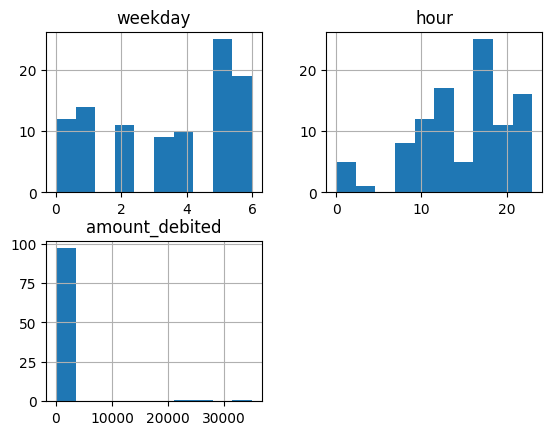

In [83]:
# df_x = df[['isWeekday','hour','amount_debited']]
df_x = df[['weekday','hour','amount_debited']]
df_x['hour']= df_x['hour'].astype(int)
df_x.hist()

In [84]:
#3 Binning using Discretizer
from sklearn.preprocessing import KBinsDiscretizer

In [85]:
dnp = np.array(df_x['amount_debited'])

array([3.5400e+02, 5.0600e+02, 1.2950e+03, 7.2700e+02, 9.0000e+01,
       9.6000e+01, 6.8000e+02, 4.0000e+02, 1.9500e+02, 8.8200e+02,
       1.0000e+03, 5.8800e+02, 3.5000e+04, 2.0000e+02, 2.5000e+02,
       2.5150e+03, 4.5000e+01, 3.2000e+02, 9.0000e+01, 2.4200e+02,
       2.0000e+01, 1.4990e+03, 1.1290e+03, 7.4000e+02, 3.4700e+02,
       1.0000e+02, 1.4800e+02, 5.7700e+02, 1.4230e+03, 1.8000e+01,
       5.5200e+02, 7.0600e+02, 6.0000e+01, 1.5000e+03, 4.2000e+02,
       3.2000e+02, 6.0000e+01, 4.8500e+02, 5.0000e+01, 3.1500e+02,
       1.0000e+02, 5.2000e+01, 2.5000e+04, 2.6000e+02, 2.2000e+02,
       5.2000e+02, 3.5000e+03, 5.1300e+02, 4.5000e+02, 2.5000e+02,
       2.9900e+02, 3.3600e+02, 2.8000e+02, 9.0000e+01, 3.2000e+02,
       7.7300e+02, 1.1000e+02, 8.0000e+01, 1.3000e+02, 6.0000e+02,
       8.8000e+01, 6.5000e+01, 2.0000e+03, 4.4600e+02, 1.1400e+02,
       1.0000e+02, 2.2741e+04, 7.1900e+02, 8.0000e+01, 3.4700e+02,
       6.1000e+02, 4.7900e+02, 6.0000e+02, 5.8000e+02, 2.0000e

In [86]:
data = dnp.reshape((len(dnp),1))

In [87]:
kbins = KBinsDiscretizer(n_bins=12, encode='ordinal', strategy='kmeans')
# kbins = KBinsDiscretizer(n_bins=10, encode='ordinal', strategy='quantile')
# kbins = KBinsDiscretizer(n_bins=25, encode='ordinal', strategy='uniform')
data_trans = kbins.fit_transform(data)

In [ ]:
df_x['amount_bin'] = [k[0] for k in data_trans]
df_x.hist()


### discretize hour into 4 buckets. i.e categorical data.

In [ ]:
kbins_hr = KBinsDiscretizer(n_bins=4, encode='ordinal', strategy='kmeans')

In [91]:
dnp_hr = np.array(df_x['hour'])
data_hr = dnp.reshape((len(dnp),1))

In [ ]:
data_trans_hr = kbins.fit_transform(data_hr)
df_x['hour_bin'] = [k[0] for k in data_trans_hr]
df_x.hist()

In [116]:
df_x =df_x[['weekday','hour','amount_bin']]
df_x.hist()

KeyError: "['amount_debited'] not in index"

In [96]:
## Kmeans now
df_x.describe()

,weekday,hour,amount_bin
count,100.000000,100.000000,100.000000
mean,3.420000,15.000000,5.160000
std,2.104253,5.561411,1.698008
min,0.000000,0.000000,0.000000
25%,1.000000,11.000000,4.000000
50%,4.000000,17.000000,5.000000
75%,5.000000,19.000000,6.000000
max,6.000000,23.000000,11.000000


In [97]:
from sklearn import preprocessing
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans

In [21]:
df_x

,isWeekday,hour,amount_bin
0,0,22,5.0
1,1,18,6.0
2,1,11,7.0
3,1,13,6.0
4,1,12,4.0
...,...,...,...
95,1,18,5.0
96,1,3,7.0
97,0,22,5.0
98,0,19,6.0


In [98]:
scaler = preprocessing.MinMaxScaler()
df_norm = scaler.fit_transform(df_x)

array([[<Axes: title={'center': '0'}>, <Axes: title={'center': '1'}>],
       [<Axes: title={'center': '2'}>, <Axes: >]], dtype=object)

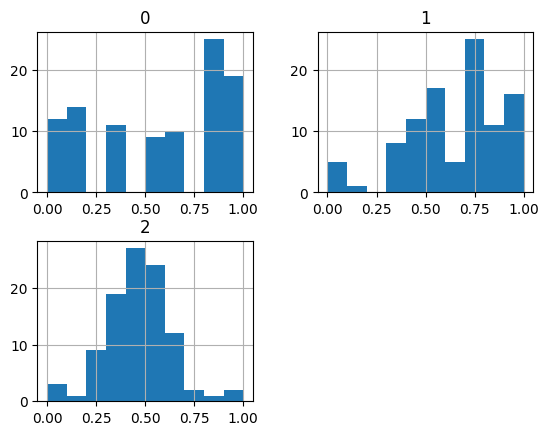

In [99]:
pd.DataFrame(df_norm).hist()

In [100]:
inertia = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(df_norm)
    kmeanModel.fit(df_norm)
    inertia.append(kmeanModel.inertia_)

/Users/anubhavtomar/2023_projects/lml-scikit/.venv/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/anubhavtomar/2023_projects/lml-scikit/.venv/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/anubhavtomar/2023_projects/lml-scikit/.venv/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/anubhavtomar/2023_projects/lml-scikit/.venv/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto

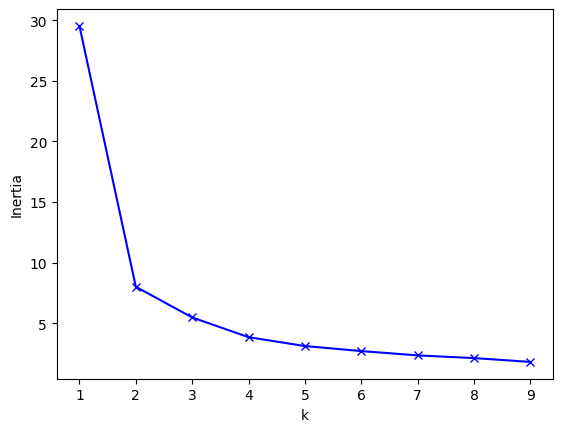

In [64]:
plt.plot(K, inertia, 'bx-')
plt.xlabel('k')
plt.ylabel('Inertia')
plt.show()

In [101]:
kmeans = KMeans(n_clusters=4).fit(df_norm)

/Users/anubhavtomar/2023_projects/lml-scikit/.venv/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [102]:
pd.DataFrame(df_norm)

,0,1,2
0,1.000000,0.956522,0.454545
1,0.833333,0.782609,0.545455
2,0.833333,0.478261,0.636364
3,0.166667,0.565217,0.545455
4,0.166667,0.521739,0.363636
...,...,...,...
95,0.166667,0.782609,0.454545
96,0.166667,0.130435,0.636364
97,0.000000,0.956522,0.454545
98,0.000000,0.826087,0.545455


In [103]:
df_x['lbl2']= kmeans.predict(df_norm)


/var/folders/xm/82jt8mcn7kn_6qqcn6zfcjj00000gn/T/ipykernel_6877/4212060185.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_x['lbl2']= kmeans.predict(df_norm)


<Axes: >

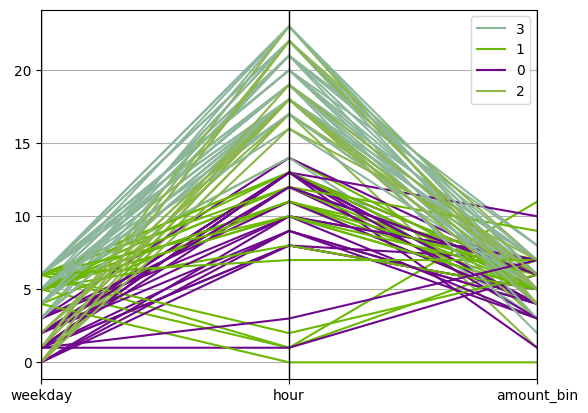

In [104]:
pd.plotting.parallel_coordinates(df_x, 'lbl2')

In [105]:
labels = pd.DataFrame(kmeans.labels_) #This is where the label output of the KMeans we just ran lives. Make it a dataframe so we can concatenate back to the original data


In [106]:
df_lbl = pd.concat((df_x,labels),axis=1)
df_lbl = df_lbl.rename({0:'labels'},axis=1)

In [107]:
df_lbl

,weekday,hour,amount_bin,lbl2,labels
0,6,22,5.0,3,3
1,5,18,6.0,3,3
2,5,11,7.0,1,1
3,1,13,6.0,0,0
4,1,12,4.0,0,0
...,...,...,...,...,...
95,1,18,5.0,2,2
96,1,3,7.0,0,0
97,0,22,5.0,2,2
98,0,19,6.0,2,2


In [73]:
sns.lmplot(x='Top10perc',y='S.F.Ratio',data=df_lbl,hue='labels',fit_reg=False)

NameError: name 'sns' is not defined

In [109]:
label =df_lbl['labels']

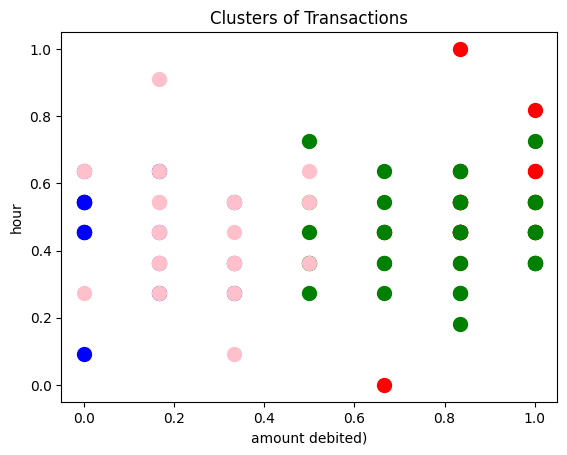

In [110]:
plt.scatter(df_norm[label==1, 0], df_norm[label==1, 2], s=100, c='red', label ='Cluster 1')
plt.scatter(df_norm[label==2, 0], df_norm[label==2, 2], s=100, c='blue', label ='Cluster 2')
plt.scatter(df_norm[label==3, 0], df_norm[label==3, 2], s=100, c='green', label ='Cluster 3')
plt.scatter(df_norm[label==0, 0], df_norm[label==0, 2], s=100, c='pink', label ='Cluster 0')
plt.title('Clusters of Transactions')
plt.xlabel('amount debited)')
plt.ylabel('hour')
plt.show()

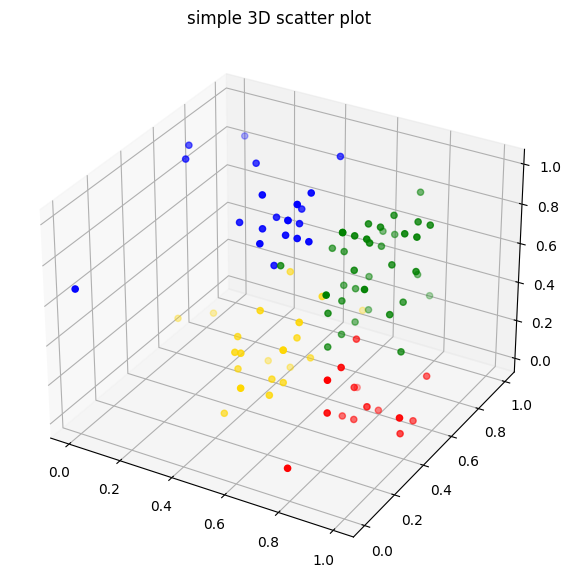

In [111]:
fig = plt.figure(figsize = (10, 7))
ax = plt.axes(projection ="3d")
 
# Creating plot
ax.scatter3D(df_norm[label==3, 1], df_norm[label==3, 2], df_norm[label==3, 0], color = "green")
ax.scatter3D(df_norm[label==2, 1], df_norm[label==2, 2], df_norm[label==2, 0], color = "red")
ax.scatter3D(df_norm[label==1, 1], df_norm[label==1, 2], df_norm[label==1, 0], color = "blue")
ax.scatter3D(df_norm[label==0, 1], df_norm[label==0, 2], df_norm[label==0, 0], color = "gold")
plt.title("simple 3D scatter plot")
plt.show()

In [112]:
df_scp = df[['date','timestamp','weekday','hour','to_vpa','amount_debited']]


In [113]:
df_scp['lbl'] =df_x['lbl2']

/var/folders/xm/82jt8mcn7kn_6qqcn6zfcjj00000gn/T/ipykernel_6877/3445325525.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_scp['lbl'] =df_x['lbl2']


In [114]:
c_0 = df_scp[df_scp['lbl']==0]
c_1 = df_scp[df_scp['lbl']==1]
c_2 = df_scp[df_scp['lbl']==2]
c_3 = df_scp[df_scp['lbl']==3]

In [115]:
c_0.sort_values(by=['amount_debited'], ascending=False) #gold

,date,timestamp,weekday,hour,to_vpa,amount_debited,lbl
42,2023-04-11,2023-04-11 13:43:49,1,13,murlikumar4u@oksbi,25000.0,0
62,2023-04-03,2023-04-03 10:15:34,0,10,lazypaypvtltd.rzp@icici,2000.0,0
33,2023-04-17,2023-04-17 08:40:50,0,08,rapido.rzp@icici,1500.0,0
28,2023-04-20,2023-04-20 10:24:54,3,10,billdesk.electricity@icici,1423.0,0
96,2023-03-14,2023-03-14 03:10:30,1,03,yathirajhn17436-1@okaxis,1200.0,0
78,2023-03-22,2023-03-22 12:33:00,2,12,upiswiggy@icici,882.0,0
3,2023-05-02,2023-05-02 13:03:32,1,13,7005754061@ibl,727.0,0
59,2023-04-05,2023-04-05 12:45:07,2,12,7005754061@ibl,600.0,0
27,2023-04-20,2023-04-20 14:07:27,3,14,swiggyinstamart@yespay,577.0,0
30,2023-04-18,2023-04-18 01:12:38,1,01,swiggyupi@axisbank,552.0,0


## Conclusions
- taking 3 dimensions and grouping using k means. 
- need to understand the class Kmeans as well to differentiate between different methods and their outputs.
- move on to better methods of encoding the data
- find a way to use vpa as a dimension.
- use vpa as a label to train supervised (later)
- correctly predict FOOD, BILL, RENT
### Ref
- https://medium.com/pursuitnotes/k-means-clustering-model-in-6-steps-with-python-35b532cfa8ad
- https://www.kaggle.com/code/ellecf/visualizing-multidimensional-clusters
- https://www.askpython.com/python/examples/plot-k-means-clusters-python
- http://www.apnorton.com/blog/2016/12/19/Visualizing-Multidimensional-Data-in-Python/
- https://stackoverflow.com/questions/27930413/how-to-plot-a-multi-dimensional-data-point-in-python
- https://dataplotplus.com/plot-scatterplot-and-kmeans-python/
- https://jakevdp.github.io/PythonDataScienceHandbook/05.11-k-means.html
- 